**Importing Libraries**

In [47]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For statistical analysis
from scipy import stats
from scipy.stats import ttest_ind

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA    # dimensionality reduction
from scipy.cluster.hierarchy import linkage, dendrogram

In [48]:
# load the dataset
df_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/knn_5_imputed_dataset.xlsx")

In [49]:
pathway_pro_82 = [
    "Samples","Gender", "Age_Group", "ABCC6", "ACBD5", "AFG3L2", "AIPL1", "ALMS1", "APOD", "APOE", "ARL2BP", "ARL6", "ARMS2",
    "ARSG", "BBS10", "BBS2", "BEST1", "C2", "C3", "C8orf37", "CABP4", "CACNA1F", "CAPN5",
    "CC2D2A", "CFB", "CFD", "CFHR1", "CHM", "CLCC1", "CLN3", "CLRN1", "CLUAP1", "CNGB3",
    "CNNM4", "COX2", "CYSLT1R", "ESPN", "GRK1", "GUCY2D", "HGSNAT", "HMCN1", "IFT27", "IMPG1",
    "ITM2B", "KLHL7", "LCA5", "LRAT", "LRP5", "LTB4R", "LTE4", "LZTFL1", "MYO7A", "NDP",
    "NEK2", "NPHP1", "NR2E3", "NRL", "PCARE", "PCDH15", "PDE6B", "PDE6C", "PDZD7", "PEX7",
    "POC1B", "PRDM13", "PROM1", "PRPF4", "RB1", "RDH5", "REEP6", "RGR", "RGS9BP", "RLBP1",
    "RP1L1", "RPGR", "SAG", "SDCCAG8", "TIMP3", "TSPAN12", "TTC8", "TUBGCP4", "TUBGCP6",
    "USH2A", "VEGFA", "WDPCP"]


In [50]:
# pathways

Inflammation = ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"]

Oxidative_Stress = ["APOD", "APOE", "ARSG", "HMCN1"]

Immunity = ["C2", "C3"]

Apoptosis = ["CAPN5", "TIMP3", "RB1"]

Aging = ["APOE", "ARMS2", "PRPF4", "GRK1"]

Visual_Perception = ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"]

Ciliopathy = ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"]

Lipid_Metabolism = ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"]

Cellular_Transport = ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"]

Signal_Transduction = ["NEK2", "PRDM13", "TSPAN12"]


In [51]:
# Create a new dataset with pathway specific proteins
df_pathway = df_1[pathway_pro_82]

df_ciliopathy = df_pathway[Ciliopathy]

# Concatenate the additional columns
df_ciliopathy = pd.concat([df_pathway[["Samples", "Gender", "Age_Group"]], df_ciliopathy], axis=1)

In [52]:
df_ciliopathy.head() # display dataset's 1st 5 rows

,Samples,Gender,Age_Group,ARL6,BBS10,BBS2,CC2D2A,CLUAP1,IFT27,NPHP1,...,RPGR,TTC8,USH2A,ALMS1,ARL2BP,CLN3,PCARE,PDZD7,WDPCP,C8orf37
0,1_50:60_F,Female,50-60,179.0,119.0,121.0,143.2,116.0,196.0,177.0,...,234.4,220.0,275.0,114.0,183.0,343.0,89.2,123.0,165.0,200.2
1,2_50:60_F,Female,50-60,167.0,127.0,115.8,136.0,115.4,214.0,182.0,...,234.2,228.4,251.0,120.0,204.0,349.0,94.0,142.8,159.0,185.2
2,3_40:50_F,Female,40-50,179.0,133.0,118.0,148.8,114.0,197.0,202.0,...,240.0,231.0,255.0,131.0,197.0,322.0,85.8,142.0,162.0,203.0
3,4_40:50_F,Female,40-50,188.0,137.0,126.0,138.2,113.6,216.0,191.0,...,234.8,236.4,260.4,140.0,178.0,330.0,88.0,133.4,184.0,179.2
4,5_50:60_F,Female,50-60,180.0,127.0,119.0,153.4,124.0,207.0,197.0,...,237.0,226.6,257.0,113.0,187.0,344.0,88.4,125.0,170.0,187.4


In [53]:
print(df_ciliopathy.shape)   # dataset rows & columns
df_ciliopathy.columns        # columns of the dataset

(500, 21)


Index(['Samples', 'Gender', 'Age_Group', 'ARL6', 'BBS10', 'BBS2', 'CC2D2A',
       'CLUAP1', 'IFT27', 'NPHP1', 'POC1B', 'RPGR', 'TTC8', 'USH2A', 'ALMS1',
       'ARL2BP', 'CLN3', 'PCARE', 'PDZD7', 'WDPCP', 'C8orf37'],
      dtype='object')

In [54]:
df_ciliopathy.info()     # details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Samples    500 non-null    object 
 1   Gender     500 non-null    object 
 2   Age_Group  500 non-null    object 
 3   ARL6       500 non-null    float64
 4   BBS10      500 non-null    float64
 5   BBS2       500 non-null    float64
 6   CC2D2A     500 non-null    float64
 7   CLUAP1     500 non-null    float64
 8   IFT27      500 non-null    float64
 9   NPHP1      500 non-null    float64
 10  POC1B      500 non-null    float64
 11  RPGR       500 non-null    float64
 12  TTC8       500 non-null    float64
 13  USH2A      500 non-null    float64
 14  ALMS1      500 non-null    float64
 15  ARL2BP     500 non-null    float64
 16  CLN3       500 non-null    float64
 17  PCARE      500 non-null    float64
 18  PDZD7      500 non-null    float64
 19  WDPCP      500 non-null    float64
 20  C8orf37   

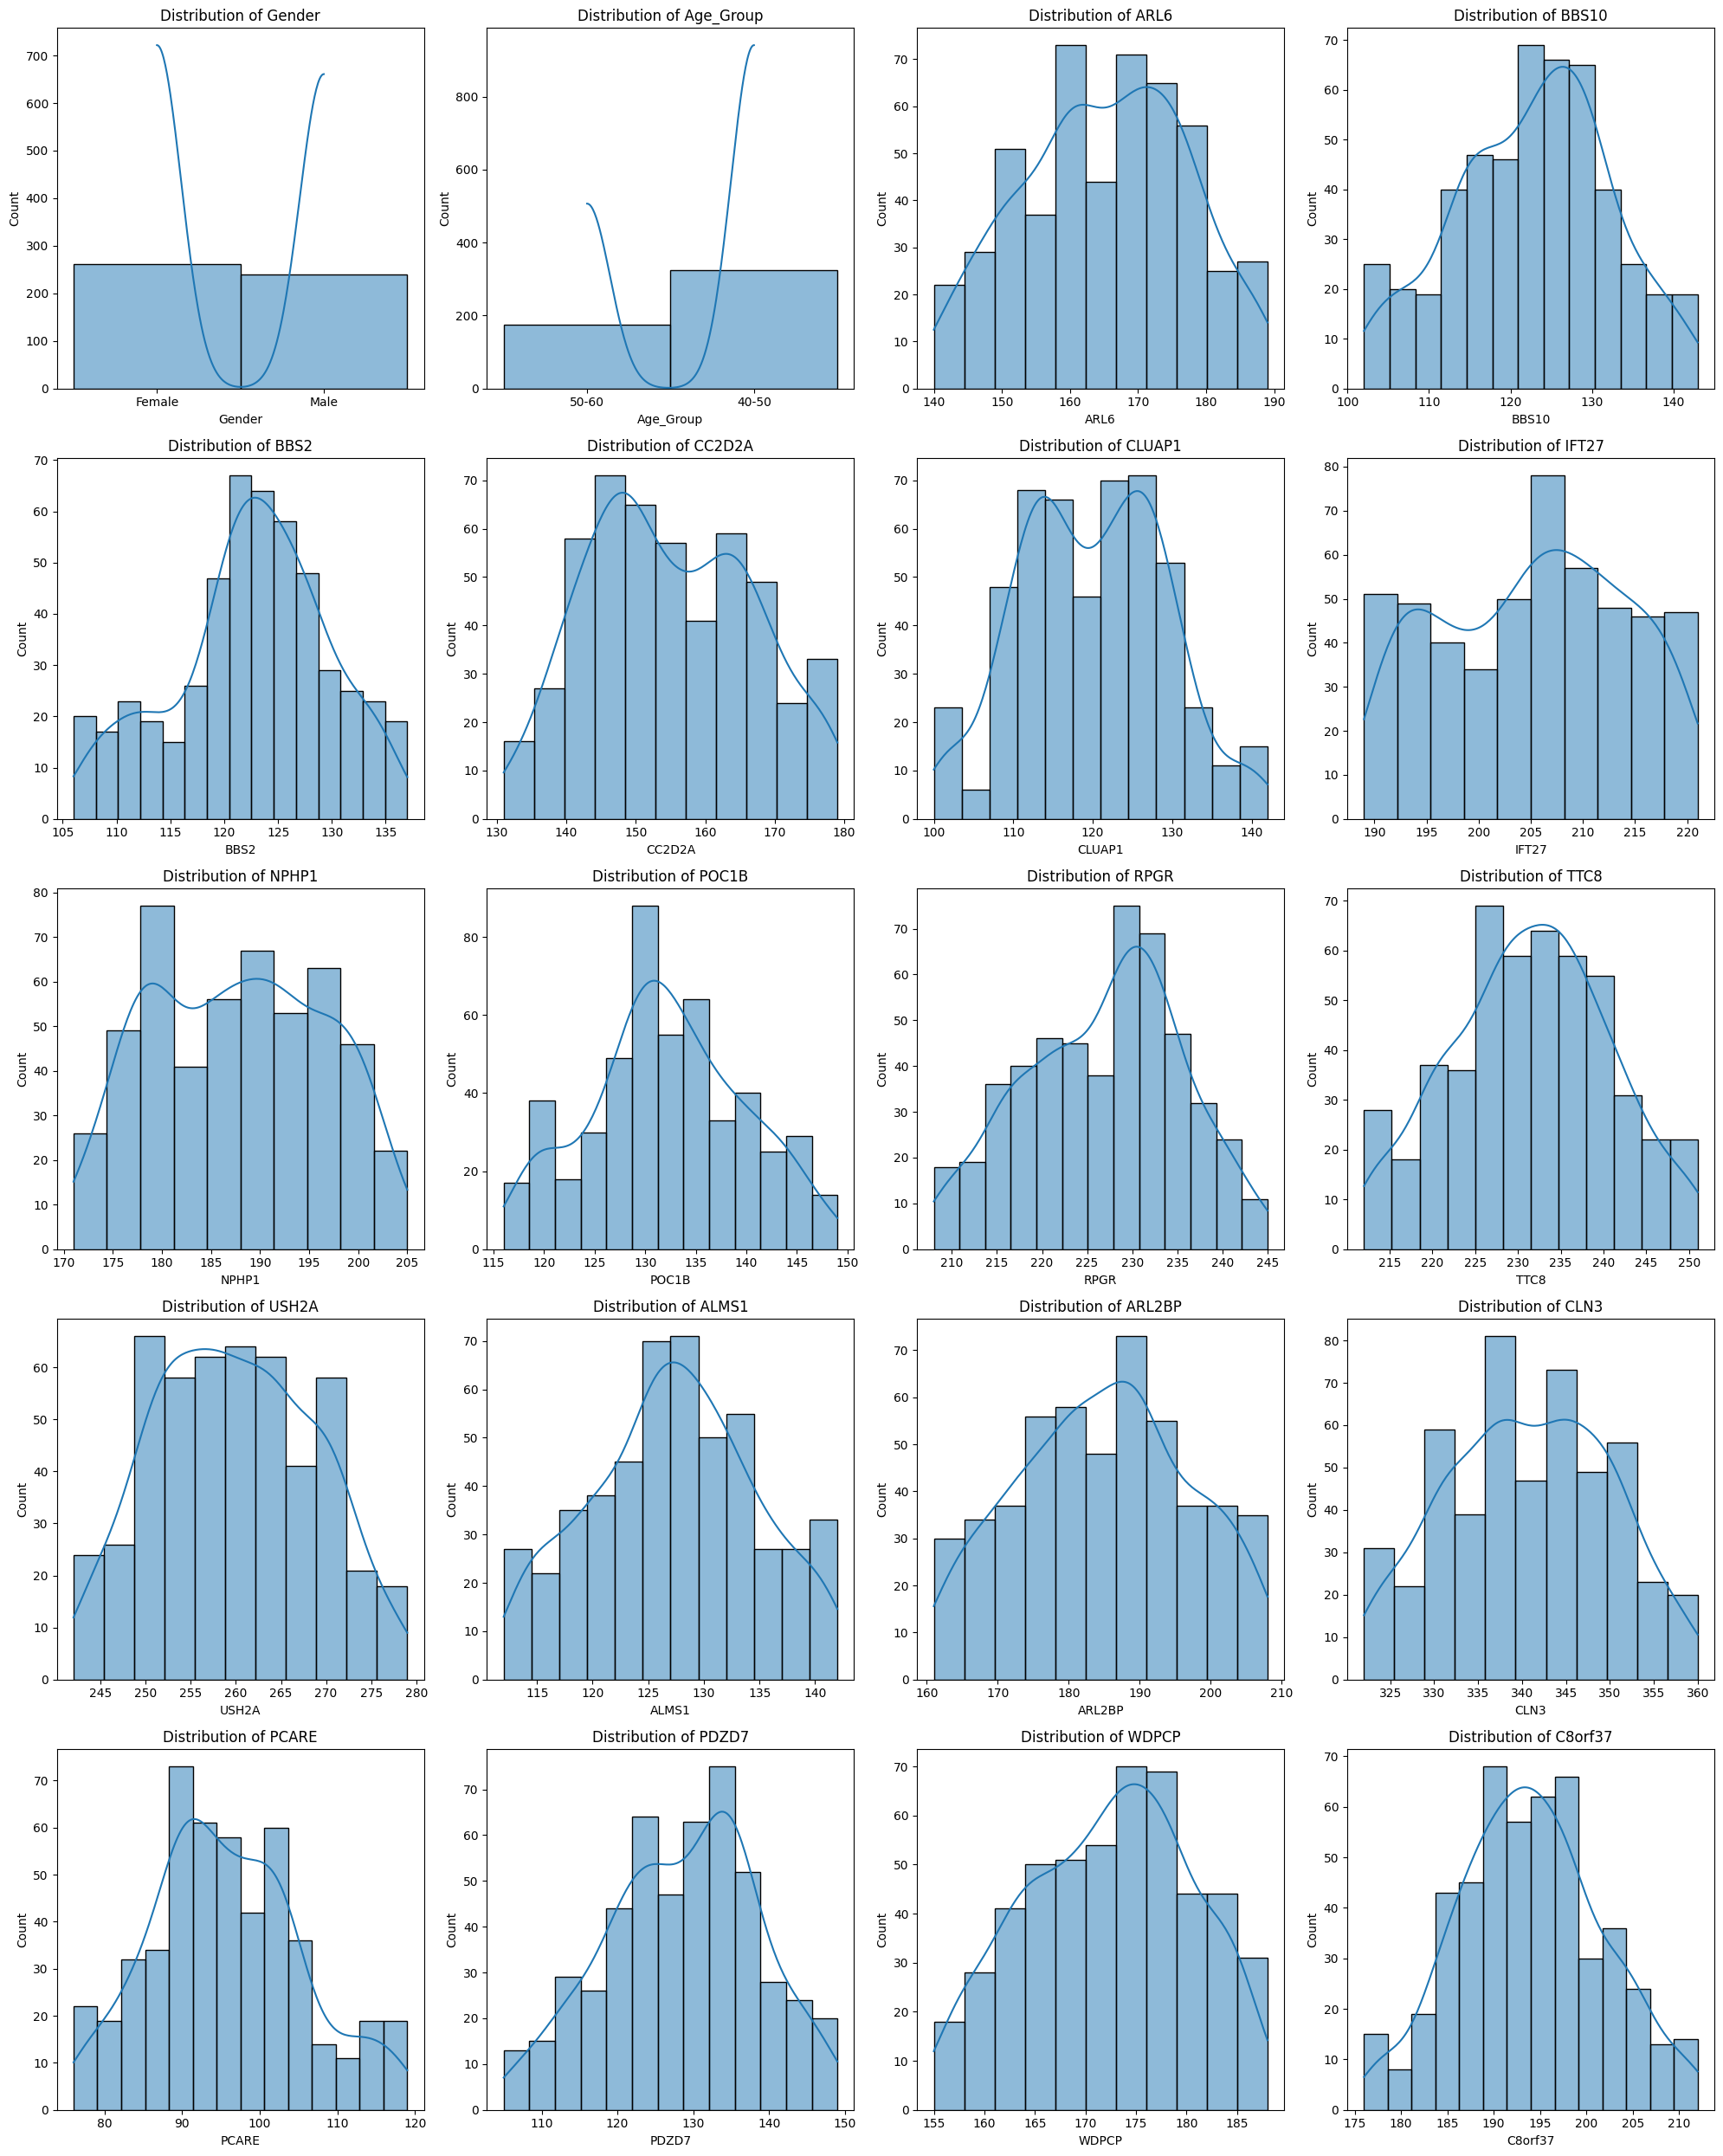

In [55]:
# Data distribution of all columns among the samples
# Number of columns to be plotted
num_columns = len(df_ciliopathy.columns) - 1  # Subtracting 1 to exclude the first column

# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (num_columns // num_cols) + (num_columns % num_cols != 0)

# Visualize the distribution of each peptide
plt.figure(figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
for i, column in enumerate(df_ciliopathy.columns[1:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_ciliopathy[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

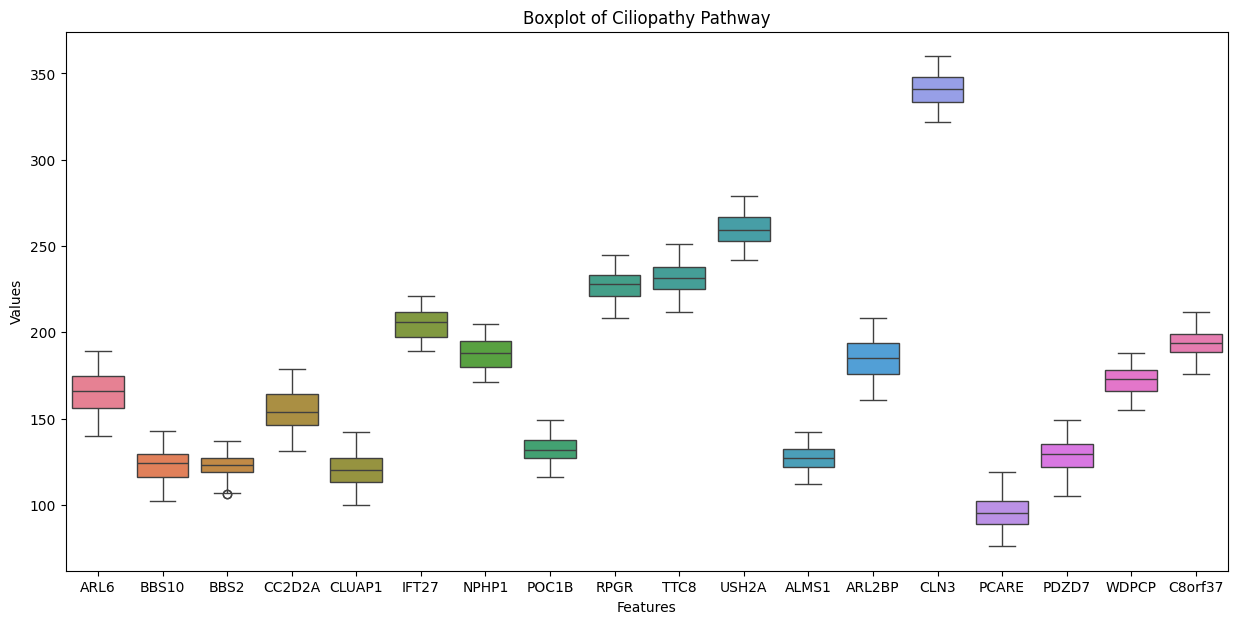

In [56]:
# Boxplot
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_ciliopathy)

plt.title("Boxplot of Ciliopathy Pathway")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()


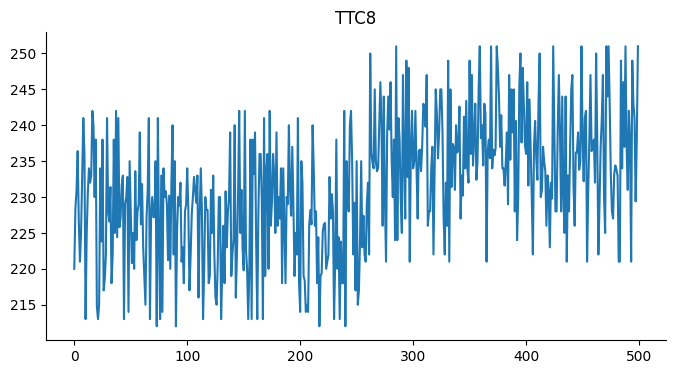

In [57]:
# TTC8 in samples

df_ciliopathy['TTC8'].plot(kind='line', figsize=(8, 4), title='TTC8')
plt.gca().spines[['top', 'right']].set_visible(False)

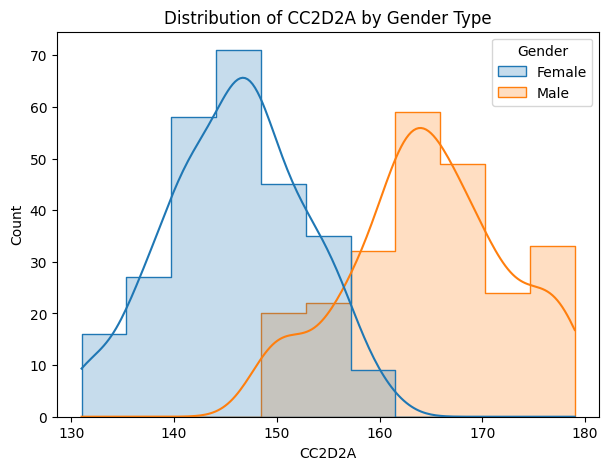

In [58]:
# Distribution plot for 'CC2D2A'
plt.figure(figsize=(7, 5))
sns.histplot(data=df_ciliopathy, x='CC2D2A', hue='Gender', kde=True, element="step")
plt.title('Distribution of CC2D2A by Gender Type')
plt.show()

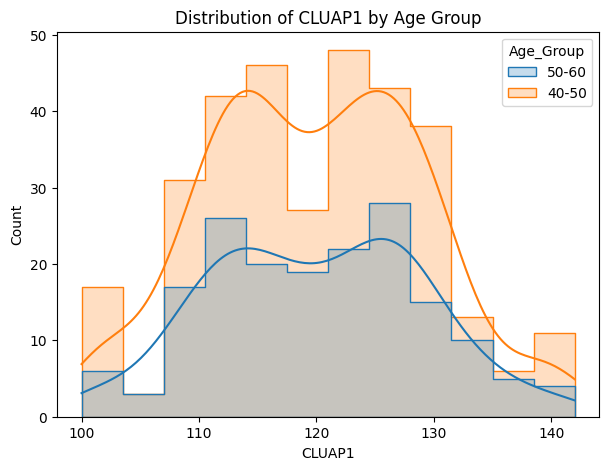

In [59]:
# Distribution plot for CLUAP1
plt.figure(figsize=(7, 5))
sns.histplot(data=df_ciliopathy, x='CLUAP1', hue='Age_Group', kde=True, element="step")
plt.title('Distribution of CLUAP1 by Age Group')
plt.show()

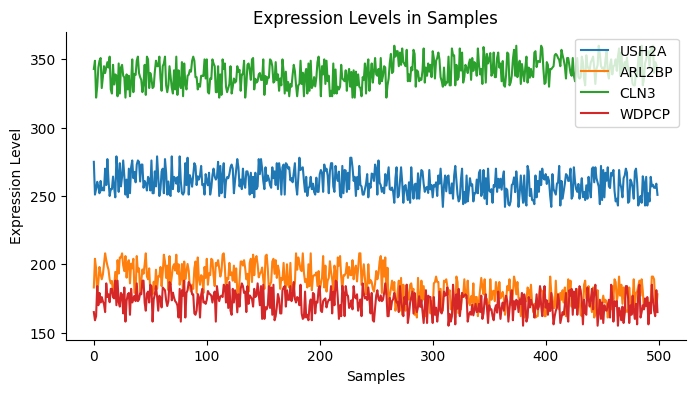

In [60]:
# Plotting proteins
df_ciliopathy[["USH2A", "ARL2BP", "CLN3", "WDPCP"]].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


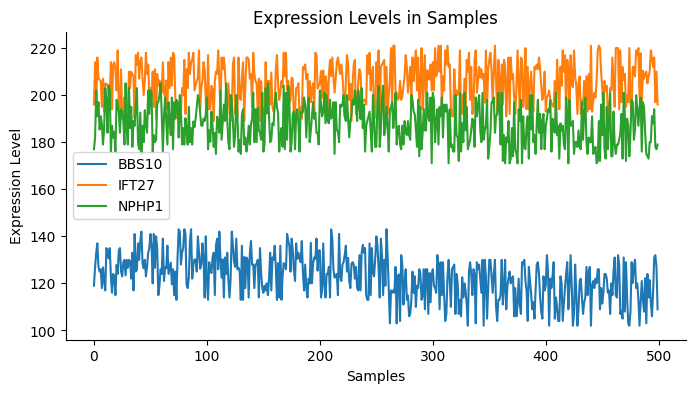

In [61]:
# Plotting proteins
df_ciliopathy[["BBS10", "IFT27", "NPHP1"]].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


Here, we calculated the frequency of each protein across samples, along with their average concentration (mean) and standard deviation. Additionally, we determined the standard deviation as a percentage of the mean expression, known as the coefficient of variation (CV). This provides a relative measure of the variability in expression levels.

In [62]:
# dictionary to store results for each protein
protein_stats = {}

for protein in df_ciliopathy.columns[3:]:
    expression_data = df_ciliopathy[protein]

    # Frequency (percentage of patients expressing the protein)
    frequency = round((expression_data > 0).sum() / len(expression_data) * 100, 3)

    # Spectral Counting Mean (average concentration)
    mean_expression = round(expression_data.mean(), 3)

    # Standard Deviation and Percentage (mean expression)
    std_dev = round(expression_data.std(), 3)
    std_dev_percentage_cv = round((std_dev / mean_expression) * 100, 3) if mean_expression != 0 else np.nan

    # store the results
    protein_stats[protein] = {
        'Frequency (%)': frequency,
        'Mean Expression': mean_expression,
        'Standard Deviation': std_dev,
        'CV (%)': std_dev_percentage_cv
    }

# convert to DataFrame
protein_stats_df = pd.DataFrame(protein_stats).T

In [63]:
protein_stats_df     # columns statistical analysis

,Frequency (%),Mean Expression,Standard Deviation,CV (%)
ARL6,100.0,165.180,12.031,7.284
BBS10,100.0,122.790,9.572,7.795
BBS2,100.0,122.519,7.077,5.776
CC2D2A,100.0,154.983,11.835,7.636
CLUAP1,100.0,119.974,9.155,7.631
IFT27,100.0,205.215,8.918,4.346
NPHP1,100.0,187.720,8.769,4.671
POC1B,100.0,132.152,7.632,5.775
RPGR,100.0,226.882,8.689,3.830
TTC8,100.0,231.481,9.282,4.010


In [64]:
df_corr = df_ciliopathy.iloc[:, 3:]    # correlation among columns
df_corr.corr()

,ARL6,BBS10,BBS2,CC2D2A,CLUAP1,IFT27,NPHP1,POC1B,RPGR,TTC8,USH2A,ALMS1,ARL2BP,CLN3,PCARE,PDZD7,WDPCP,C8orf37
ARL6,1.000000,0.406291,0.009911,-0.638209,-0.523671,-0.044876,0.199464,-0.186320,0.358285,-0.463348,0.330574,0.030789,0.548973,-0.355190,-0.498292,0.572738,0.243792,-0.275633
BBS10,0.406291,1.000000,0.030659,-0.430260,-0.285139,-0.074454,0.077949,-0.074199,0.179899,-0.367639,0.204898,0.061869,0.330053,-0.228906,-0.394363,0.314942,0.157757,-0.205334
BBS2,0.009911,0.030659,1.000000,0.046298,0.053956,-0.014307,0.029550,-0.047292,-0.035832,-0.001661,0.032958,-0.115529,0.001882,0.008056,-0.001780,-0.010118,-0.055322,0.055498
CC2D2A,-0.638209,-0.430260,0.046298,1.000000,0.533691,0.085309,-0.127943,0.176557,-0.349699,0.410526,-0.246070,-0.058981,-0.594095,0.341877,0.532935,-0.517076,-0.262296,0.330370
CLUAP1,-0.523671,-0.285139,0.053956,0.533691,1.000000,0.010387,-0.085417,0.180318,-0.320953,0.288638,-0.172964,-0.076785,-0.501995,0.218073,0.443134,-0.460691,-0.234528,0.271960
IFT27,-0.044876,-0.074454,-0.014307,0.085309,0.010387,1.000000,0.012037,-0.069157,-0.023075,0.051532,-0.062950,0.013088,-0.026327,0.033347,0.018368,0.030925,0.040326,0.040913
NPHP1,0.199464,0.077949,0.029550,-0.127943,-0.085417,0.012037,1.000000,-0.065115,0.066266,-0.147419,0.132374,0.005892,0.190078,-0.100160,-0.131473,0.070082,-0.039336,-0.078210
POC1B,-0.186320,-0.074199,-0.047292,0.176557,0.180318,-0.069157,-0.065115,1.000000,-0.101948,0.177347,-0.091480,-0.034507,-0.127377,0.092236,0.235362,-0.166017,-0.074236,0.041079
RPGR,0.358285,0.179899,-0.035832,-0.349699,-0.320953,-0.023075,0.066266,-0.101948,1.000000,-0.175503,0.128858,-0.017565,0.327021,-0.248295,-0.275050,0.255709,0.084112,-0.140064
TTC8,-0.463348,-0.367639,-0.001661,0.410526,0.288638,0.051532,-0.147419,0.177347,-0.175503,1.000000,-0.213216,-0.054514,-0.421628,0.170566,0.339290,-0.386981,-0.202734,0.079692


Strong Positive Correlations: ARL6 & PDZD7 (0.572), ARL6 & ARL2BP (0.549), CC2D2A & CLUAP1 (0.534), PCARE & CC2D2A (0.533) – These gene pairs show significant co-regulation or functional interaction.

Strong Negative Correlations: ARL6 & CC2D2A (-0.638), ARL6 & CLUAP1 (-0.524), ARL2BP & CC2D2A (-0.594) – Suggest inverse regulation or opposing roles.

Weak Correlations: BBS2, IFT27, and NPHP1 have weak correlations with other genes, indicating limited interaction.

Clusters of Interaction: There appears to be a cluster of genes that correlate positively with each other: CC2D2A, CLUAP1, PCARE, and C8orf37. This could indicate a sub-network or module within the ciliopathy pathway where these genes may work in concert.

Inverse Regulation:
CC2D2A has negative correlations with ARL6 and ARL2BP, suggesting inverse regulation.

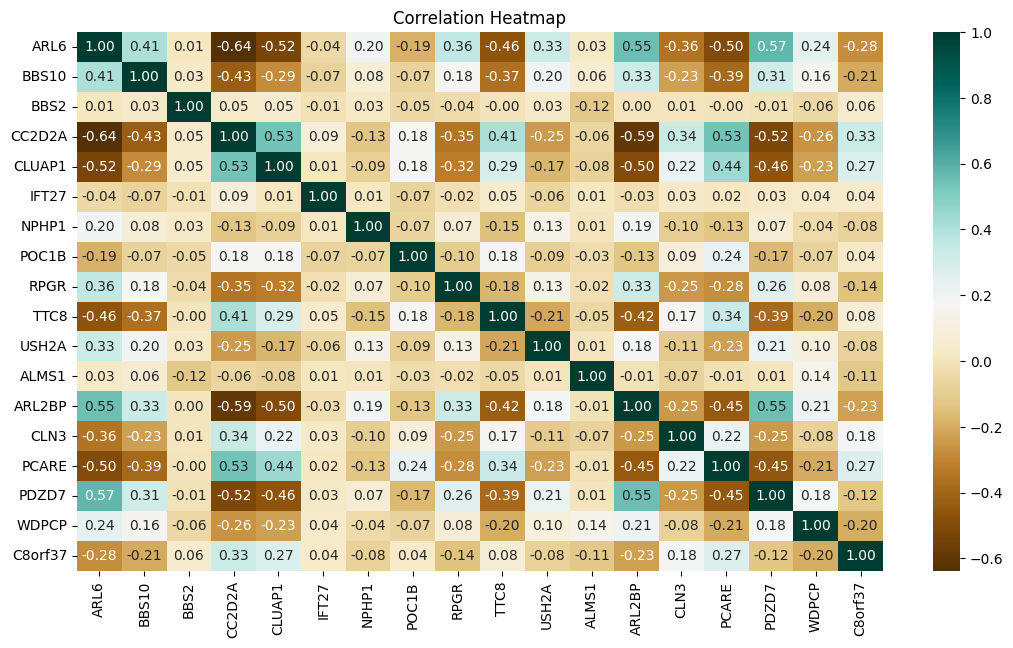

In [65]:
# Correlation Heatmap
plt.figure(figsize=(13, 7))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Performed statistical tests to identify proteins that show significant differences in expression levels between different genders (male and female) and between different age groups (40-50 and 50-60).

In [66]:
# Segregate data by gender and age group
males = df_ciliopathy[df_ciliopathy['Gender'] == 'Male']
females = df_ciliopathy[df_ciliopathy['Gender'] == 'Female']

age_40_50 = df_ciliopathy[df_ciliopathy['Age_Group'] == '40-50']
age_50_60 = df_ciliopathy[df_ciliopathy['Age_Group'] == '50-60']

# List to store significant proteins
significant_proteins_gender = []
significant_proteins_age = []

for protein in df_ciliopathy.columns[3:]:
    # Gender differences (t-test)
    t_stat, p_val_gender = ttest_ind(males[protein], females[protein], nan_policy='omit')
    if p_val_gender < 0.05:
        significant_proteins_gender.append(protein)

    # Age group differences (t-test)
    t_stat, p_val_age = ttest_ind(age_40_50[protein], age_50_60[protein], nan_policy='omit')
    if p_val_age < 0.05:
        significant_proteins_age.append(protein)

print("Proteins with significant differences between genders:", significant_proteins_gender)
print("Proteins with significant differences between age groups:", significant_proteins_age)


Proteins with significant differences between genders: ['ARL6', 'BBS10', 'CC2D2A', 'CLUAP1', 'IFT27', 'NPHP1', 'POC1B', 'RPGR', 'TTC8', 'USH2A', 'ARL2BP', 'CLN3', 'PCARE', 'PDZD7', 'WDPCP', 'C8orf37']
Proteins with significant differences between age groups: []


In [67]:
print('Number of significant proteins:', len(significant_proteins_gender))
print('Number of significant proteins:', len(significant_proteins_age))

Number of significant proteins: 16
Number of significant proteins: 0


In [68]:
# Convert Gender and Age_Group columns to categorical type
df_1['Gender'] = df_1['Gender'].astype('category')
df_1['Age_Group'] = df_1['Age_Group'].astype('category')

# pathway dictionary
pathways = {
    "Inflammation": ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"],
    "Oxidative_Stress": ["APOD", "APOE", "ARSG", "HMCN1"],
    "Immunity": ["C2", "C3"],
    "Apoptosis": ["CAPN5", "TIMP3", "RB1"],
    "Aging": ["APOE", "ARMS2", "PRPF4", "GRK1"],
    "Visual_Perception": ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"],
    "Ciliopathy": ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"],
    "Lipid_Metabolism": ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"],
    "Cellular_Transport": ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"],
    "Signal_Transduction": ["NEK2", "PRDM13", "TSPAN12"]
}

# Select the pathway to analyze
selected_pathway = "Ciliopathy"  # Change this to analyze a different pathway

# Subset the DataFrame for the selected pathway
proteins = pathways[selected_pathway]
df_pathway_stat = df_1[proteins + ['Gender', 'Age_Group']]

# Summary statistics for the selected pathway
summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])
print(f"Summary Statistics for {selected_pathway} Pathway:")
print(summary_stats)


Summary Statistics for Ciliopathy Pathway:
                        ARL6                        BBS10                   \
                        mean median       std        mean median       std   
Gender Age_Group                                                             
Female 40-50      173.678409  173.6  7.373837  127.721591  128.0  8.303637   
       50-60      175.167059  176.0  7.122991  126.757647  127.0  7.398075   
Male   40-50      154.849664  154.6  7.575098  117.966443  119.0  8.830947   
       50-60      156.231111  158.1  7.976365  117.384444  117.0  8.069375   

                        BBS2                       CC2D2A  ...     PCARE  \
                        mean median       std        mean  ...       std   
Gender Age_Group                                           ...             
Female 40-50      122.337500  123.0  7.503840  145.952273  ...  6.901055   
       50-60      122.449412  122.6  7.362188  146.009412  ...  7.396292   
Male   40-50      122.373154  

<ipython-input-68-b6f2b4daad73>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])


In [69]:
# # Display summary statistics as a DataFrame
# summary_stats_df = pd.DataFrame(summary_stats)
# display(summary_stats_df)

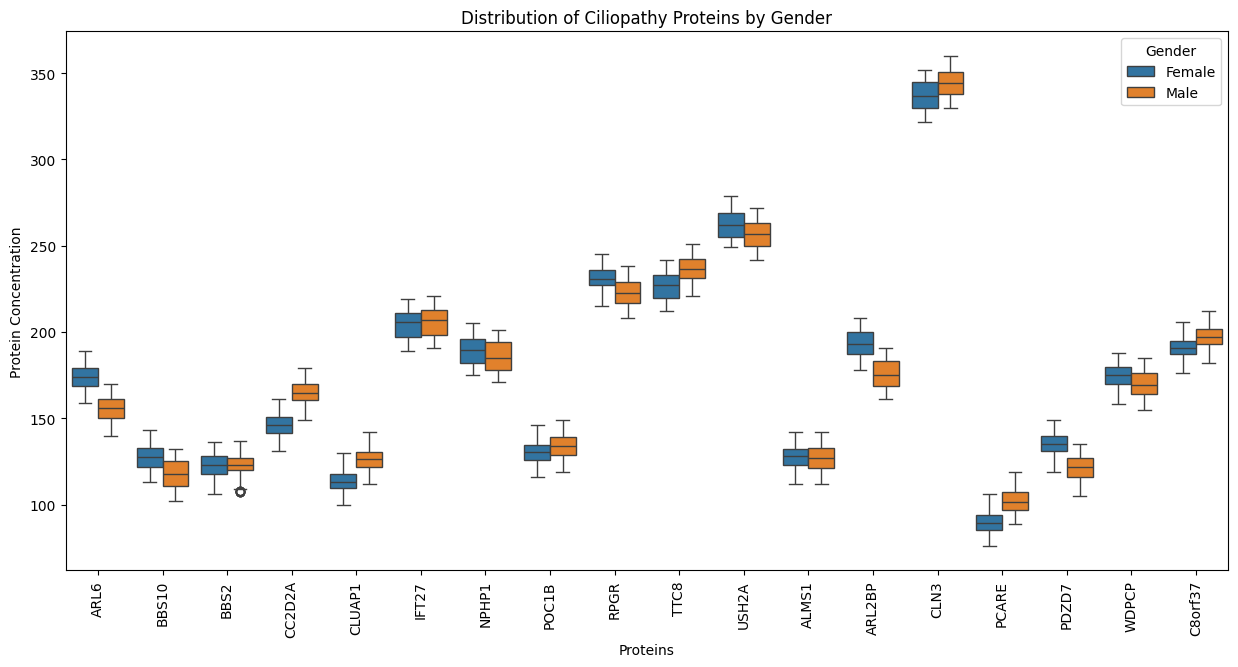

In [70]:
# Visualization: Distribution by Gender
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Gender')
plt.title(f"Distribution of {selected_pathway} Proteins by Gender")
plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

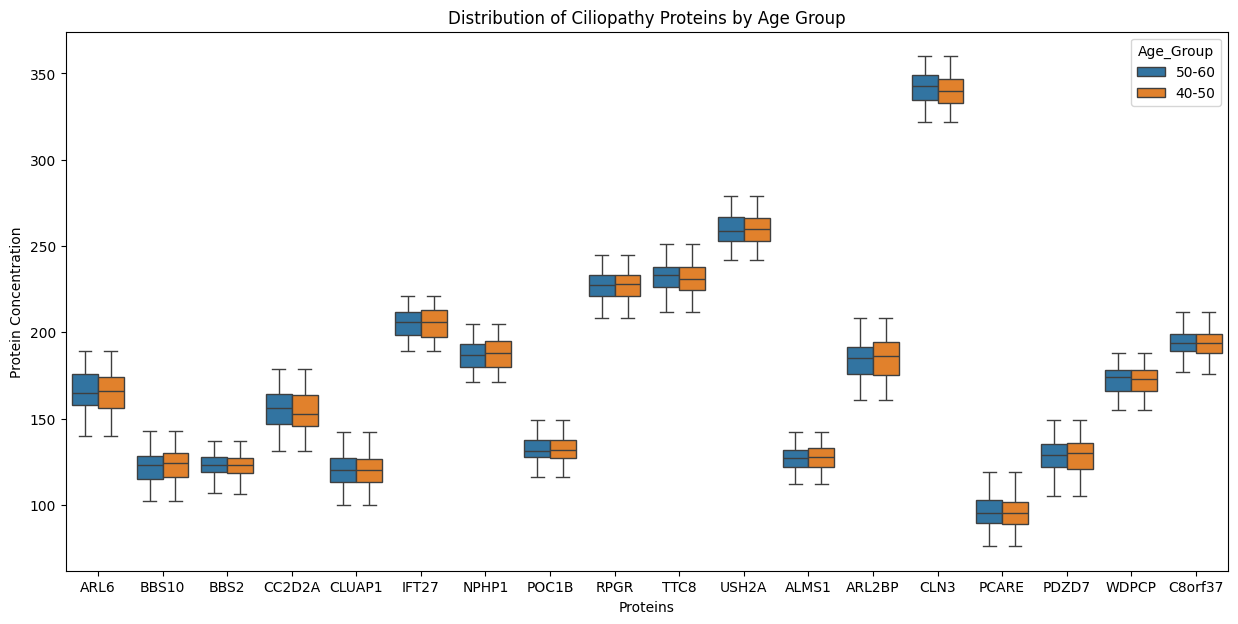

In [71]:
# Visualization: Distribution by Age Group
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Age_Group')
plt.title(f"Distribution of {selected_pathway} Proteins by Age Group")
# plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

Here, we normalized the spectral counting data and categorized the proteins based on their expression levels.

In [72]:
p_columns = df_ciliopathy.columns[3:]  # protein columns

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = df_ciliopathy.copy()
df_normalized[p_columns] = scaler.fit_transform(df_ciliopathy[p_columns])

# Categorize proteins
def categorize_expression_level(value):
    if value >= 0.7:
        return 'Highly Expressed'
    elif value <= 0.3:
        return 'Lowly Expressed'
    else:
        return 'Moderately Expressed'

# Apply categorization to each protein column
df_categorized = df_normalized.copy()
for col in p_columns:
    df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

# categorization results
summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
summary = summary.transpose()

# Display the summary
print(summary)

         Highly Expressed  Lowly Expressed  Moderately Expressed
ARL6                  126              109                   265
BBS10                  97              104                   299
BBS2                  122               89                   289
CC2D2A                116              116                   268
CLUAP1                 74              112                   314
IFT27                 141              140                   219
NPHP1                 131              152                   217
POC1B                  93               97                   310
RPGR                  113              112                   275
TTC8                  103              106                   291
USH2A                 112              139                   249
ALMS1                 120              116                   264
ARL2BP                124              124                   252
CLN3                  118              126                   256
PCARE                  65

In [73]:
# convert the result summary in a DataFrame
summary_df = summary.reset_index()
summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
summary_df

,Protein,Highly Expressed,Lowly Expressed,Moderately Expressed
0,ARL6,126,109,265
1,BBS10,97,104,299
2,BBS2,122,89,289
3,CC2D2A,116,116,268
4,CLUAP1,74,112,314
5,IFT27,141,140,219
6,NPHP1,131,152,217
7,POC1B,93,97,310
8,RPGR,113,112,275
9,TTC8,103,106,291


In [74]:
# Function to normalize and categorize proteins
def normalize_and_categorize(df, p_columns):
    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[p_columns] = scaler.fit_transform(df[p_columns])

    # Apply categorization to each protein column
    df_categorized = df_normalized.copy()
    for col in p_columns:
        df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

    # Summarize the categorization results
    summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
    summary = summary.transpose()

     # Reindex the summary to ensure all categories are present
    summary = summary.reindex(columns=["Highly Expressed", "Lowly Expressed",  "Moderately Expressed"], fill_value=0)

    # Convert the result summary into a DataFrame
    summary_df = summary.reset_index()
    summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
    return summary_df

# Normalize and categorize for Male
summary_male_df = normalize_and_categorize(males, p_columns)

# Normalize and categorize for Female
summary_female_df = normalize_and_categorize(females, p_columns)

# Display the results
print("Summary for Males:")
print(summary_male_df)

print("\nSummary for Females:")
print(summary_female_df)

Summary for Males:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0      ARL6                56               54                   129
1     BBS10                76               63                   100
2      BBS2                50               39                   150
3    CC2D2A                63               45                   131
4    CLUAP1                35               50                   154
5     IFT27                76               69                    94
6     NPHP1                75               85                    79
7     POC1B                53               55                   131
8      RPGR                57               71                   111
9      TTC8                65               45                   129
10    USH2A                60               65                   114
11    ALMS1                58               61                   120
12   ARL2BP                68               64                   107
13     CLN3    

In [75]:
# Normalize and categorize for Age 40-50
summary_age_40_50_df = normalize_and_categorize(age_40_50, p_columns)

# Normalize and categorize for Age 50-60
summary_age_50_60_df = normalize_and_categorize(age_50_60, p_columns)

# Display the results
print("Summary for Age 40-50:")
print(summary_age_40_50_df)

print("\nSummary for Age 50-60:")
print(summary_age_50_60_df)

Summary for Age 40-50:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0      ARL6                78               75                   172
1     BBS10                67               62                   196
2      BBS2                76               65                   184
3    CC2D2A                74               79                   172
4    CLUAP1                49               75                   201
5     IFT27                94               96                   135
6     NPHP1                94               97                   134
7     POC1B                61               63                   201
8      RPGR                73               71                   181
9      TTC8                65               76                   184
10    USH2A                70               90                   165
11    ALMS1                81               77                   167
12   ARL2BP                86               82                   157
13     CLN3

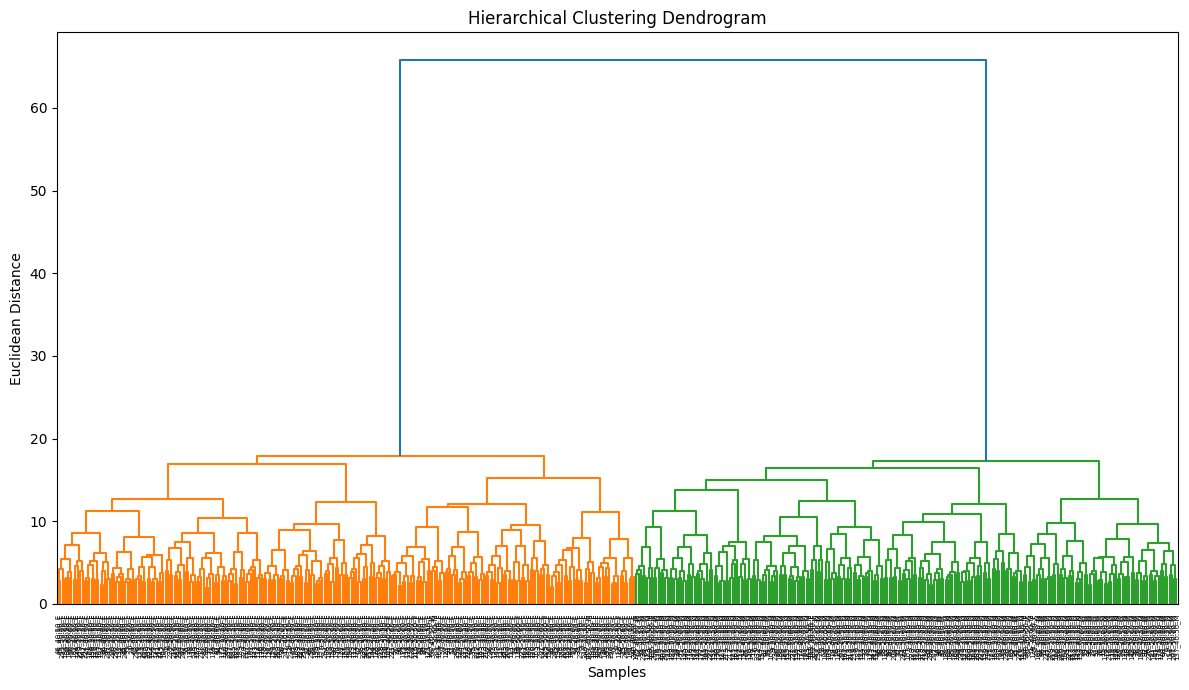

In [76]:
# Select only the protein columns for clustering
protein_columns = ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"]
df_proteins = df_ciliopathy[protein_columns]

# Standardize the data
ss_scaler = StandardScaler()
df_proteins_scaled = ss_scaler.fit_transform(df_proteins)

# Perform hierarchical clustering
linkage_matrix = linkage(df_proteins_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix, labels=df_ciliopathy['Samples'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [77]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 2  # Adjust this number as needed
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame to easily view the sample names with their corresponding clusters
df_clusters_d = pd.DataFrame({
    'Sample': df_ciliopathy['Samples'],
    'Cluster': cluster_labels
})

# Group the samples by their cluster
clusters = df_clusters_d.groupby('Cluster')['Sample'].apply(list).to_dict()

# Print each cluster as a list
for cluster_id, samples in clusters.items():
    print(f"Cluster {cluster_id}: {samples}\n")

Cluster 1: ['35_40:50_F', '129_40:50_F', '135_40:50_F', '151_40:50_F', '158_40:50_F', '248_40:50_F', '1_50:60_M', '2_40:50_M', '3_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '8_40:50_M', '9_50:60_M', '10_40:50_M', '11_40:50_M', '12_40:50_M', '13_50:60_M', '14_40:50_M', '15_50:60_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '20_40:50_M', '21_50:60_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '35_50:60_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '43_50:60_M', '44_40:50_M', '45_40:50_M', '46_50:60_M', '47_50:60_M', '48_40:50_M', '49_50:60_M', '50_40:50_M', '51_40:50_M', '52_50:60_M', '53_40:50_M', '54_40:50_M', '55_50:60_M', '56_40:50_M', '57_40:50_M', '58_50:60_M', '59_40:50_M', '60_40:50_M', '61_50:60_M', '62_40:50_M', '63_50:60_M', '64_40:50_M', '65_50:60_M', '66_40:50_M

In [78]:
cluster_counts = df_clusters_d['Cluster'].value_counts()
cluster_counts

,count
Cluster,
2,258
1,242


Performed clustering to identify natural groupings or patterns in our data. We used K-means algorithm and Elbow method to determine the optimal number of clusters by plotting the Within-Cluster Sum of Square (WCSS) against different numbers of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

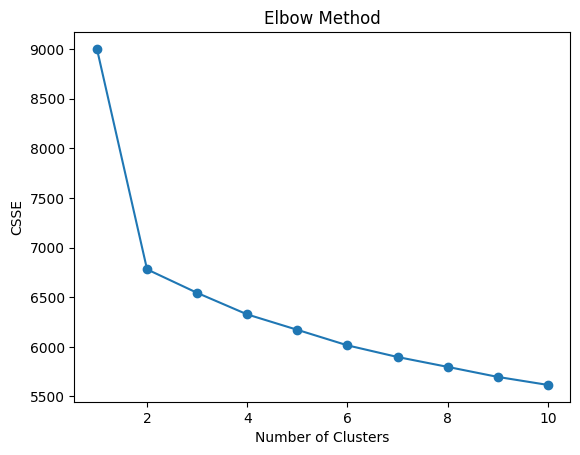

In [79]:
pro_columns = df_ciliopathy.columns[3:]

# Data Standardization/Normalization
s_scaler = StandardScaler()
# m_scaler = MinMaxScaler()
X = s_scaler.fit_transform(df_ciliopathy[pro_columns])

k_rang = range(1, 11)
csse = []

for k in k_rang:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    csse.append(kmeans.inertia_)    # sum of square error

# Plotting the Elbow Curve
plt.plot(k_rang, csse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CSSE')
plt.show()

In [80]:
csse

[8999.999999999996,
 6779.947169795451,
 6543.25307843553,
 6326.188831996376,
 6170.945028588096,
 6014.652172323512,
 5897.2701067522285,
 5797.7905638891925,
 5696.781831258897,
 5616.148916736006]

In [81]:
# K-means Clustering (optimal k based on the Elbow plot)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X)
print(clusters)

# Add cluster labels to the DataFrame
df_cluster = df_ciliopathy.copy()
df_cluster['Cluster'] = clusters

# print the DataFrame
df_cluster

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Samples,Gender,Age_Group,ARL6,BBS10,BBS2,CC2D2A,CLUAP1,IFT27,NPHP1,...,TTC8,USH2A,ALMS1,ARL2BP,CLN3,PCARE,PDZD7,WDPCP,C8orf37,Cluster
0,1_50:60_F,Female,50-60,179.0,119.0,121.0,143.2,116.0,196.0,177.0,...,220.0,275.0,114.0,183.0,343.0,89.2,123.0,165.0,200.2,1
1,2_50:60_F,Female,50-60,167.0,127.0,115.8,136.0,115.4,214.0,182.0,...,228.4,251.0,120.0,204.0,349.0,94.0,142.8,159.0,185.2,1
2,3_40:50_F,Female,40-50,179.0,133.0,118.0,148.8,114.0,197.0,202.0,...,231.0,255.0,131.0,197.0,322.0,85.8,142.0,162.0,203.0,1
3,4_40:50_F,Female,40-50,188.0,137.0,126.0,138.2,113.6,216.0,191.0,...,236.4,260.4,140.0,178.0,330.0,88.0,133.4,184.0,179.2,1
4,5_50:60_F,Female,50-60,180.0,127.0,119.0,153.4,124.0,207.0,197.0,...,226.6,257.0,113.0,187.0,344.0,88.4,125.0,170.0,187.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,235_50:60_M,Male,50-60,164.0,115.8,123.8,149.0,113.0,212.0,188.0,...,243.0,258.2,121.6,191.0,360.0,101.0,133.0,174.0,202.0,0
496,236_40:50_M,Male,40-50,165.0,131.0,133.0,156.0,122.2,216.0,194.0,...,241.0,256.0,124.6,189.0,340.2,114.0,121.6,166.0,202.8,0
497,237_50:60_M,Male,50-60,142.0,132.0,109.0,158.8,135.0,197.0,178.0,...,229.4,256.0,125.8,172.0,348.0,91.0,122.8,162.0,191.0,0
498,238_40:50_M,Male,40-50,153.0,127.0,111.0,159.8,125.0,210.0,177.0,...,238.0,259.0,142.0,167.2,346.0,90.0,110.0,181.0,187.4,0


In [82]:
# Group the DataFrame by the 'Cluster' column
clustered_samples = df_cluster.groupby('Cluster')['Samples'].apply(list)

# Print the sample names for each cluster
for cluster, samples in clustered_samples.items():
    print(f"Cluster {cluster}:")
    print(samples)
    print("\n")


Cluster 0:
['157_40:50_F', '1_50:60_M', '2_40:50_M', '3_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '7_50:60_M', '8_40:50_M', '9_50:60_M', '10_40:50_M', '11_40:50_M', '12_40:50_M', '13_50:60_M', '14_40:50_M', '15_50:60_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '20_40:50_M', '21_50:60_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '35_50:60_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '43_50:60_M', '44_40:50_M', '45_40:50_M', '46_50:60_M', '47_50:60_M', '48_40:50_M', '49_50:60_M', '50_40:50_M', '51_40:50_M', '52_50:60_M', '54_40:50_M', '55_50:60_M', '56_40:50_M', '57_40:50_M', '58_50:60_M', '59_40:50_M', '60_40:50_M', '61_50:60_M', '62_40:50_M', '63_50:60_M', '64_40:50_M', '65_50:60_M', '66_40:50_M', '67_50:60_M', '68_40:50_M', '69_50:60_M', '70_40:50_M', '71_40:50_M', '7

In [83]:
# kmeans.cluster_centers_

df_cluster.value_counts('Cluster')

,count
Cluster,
1,261
0,239


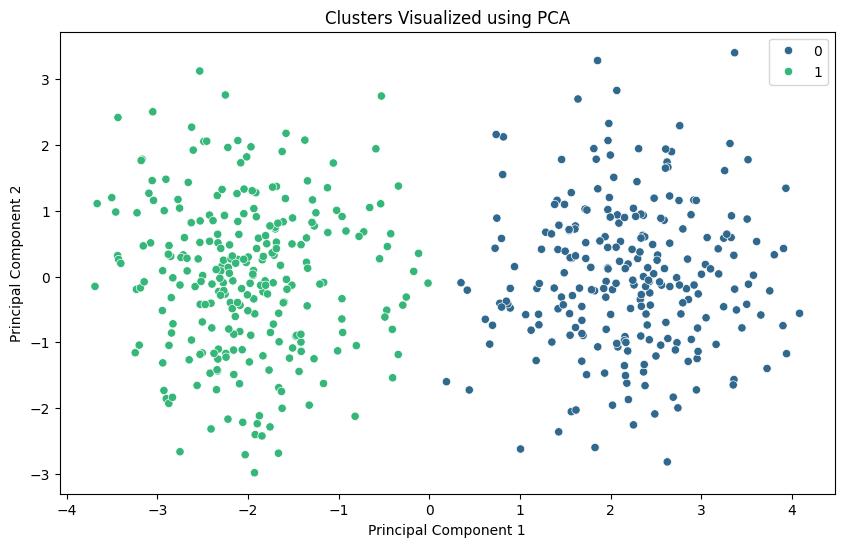

In [84]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

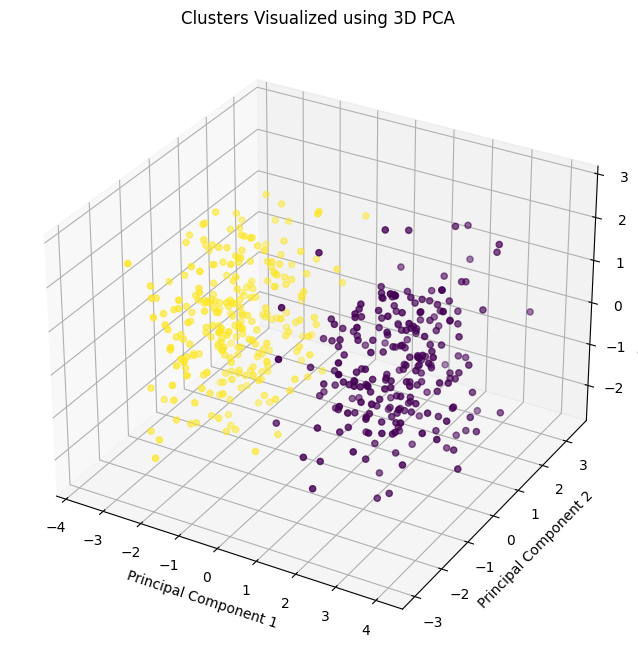

In [85]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clusters Visualized using 3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
